<a href="https://colab.research.google.com/github/codewithalishakhan/Zomato_Restaurant_Analysis/blob/main/ZOMATO_RESTAURANT_ANALYSIS_ML(4)_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Zomato Restaurant Clustering And Sentiment Analysis



##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
Name - **Alisha Khan**

Cohort - **Nairobi**



  


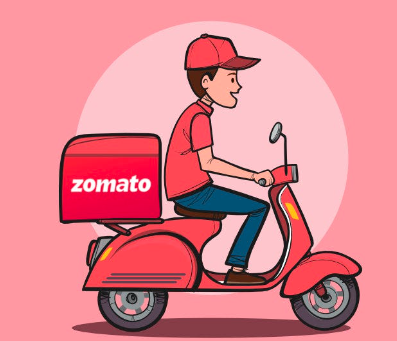

# **Project Summary -**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by **Deepinder Goyal** and **Pankaj Chaddah** in 2008.
This project analyzes Zomato's restaurant data for customer sentiments and company growth. Through sentiment analysis and restaurant segmentation, it derives actionable insights and addresses key business cases. Utilizing customer reviews and metadata, the project aims to enhance the dining experience and identify areas for improvement. Visualizations aid in understanding customer preferences and clustering restaurants for strategic decision-making. Ultimately, the project facilitates both customer satisfaction and company development within the diverse Indian food industry.


# **GitHub Link -**

https://github.com/codewithalishakhan/Zomato_Restaurant_Analysis



# **Problem Statement**



The challenge is to effectively analyze Zomato's restaurant data to understand customer sentiments, segment restaurants, and address business cases. This entails deriving actionable insights from reviews, clustering restaurants for strategic decisions, and enhancing overall service quality. The goal is to facilitate informed decision-making for consumers and faster growth opportunities for businesses in the dynamic Indian food industry landscape.




# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import silhouette_samples, silhouette_score
pd.set_option('display.max_columns',None)


import warnings
warnings .filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
# from google.colab import drive
# drive .mount ('/content/drive')

meta_df_1 = pd.read_csv('/content/Zomato Restaurant names and Metadata.csv')
meta_df_1


In [ ]:
review_df_2 = pd.read_csv("/content/Zomato Restaurant reviews.csv")
review_df_2

### Dataset First View

In [ ]:
# Dataset First Look
meta_df_1.head()

In [ ]:
review_df_2.head()

In [ ]:
meta_df_1.tail()

In [ ]:
review_df_2.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
meta_df_1.shape

In [ ]:
review_df_2.shape

### Dataset Information

In [ ]:
# Dataset Info
meta_df_1.info()

In [ ]:
review_df_2.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
meta_df_1.duplicated().sum()

In [ ]:
review_df_2.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
meta_df_1.isna().sum().sort_values(ascending=False)

In [ ]:
review_df_2.isna().sum().sort_values(ascending=False)

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
sns.heatmap(meta_df_1.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title("Visualizing missing values");

### What did you know about your dataset?

There are two data sets provided for the analysis. One is based on the information about the various restaurant that uses the Zomato delivery services ,the file named as meta data. Another one is based on reviews given by the customers to those particular restaurants that are mentioned the meta data .Meta files has the dimension 105 rows and 6 columns as variables and the reviews files has the dimensions of 1000 rows and 7 columns . Also there are 36 duplicates values in the review file but there are no duplicates in meta data file. In addition to that there are also missing values in both the datasets.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
meta_df_1.columns


In [ ]:
review_df_2.columns

In [ ]:
# Dataset Describe
meta_df_1.describe()

In [ ]:
review_df_2.describe()

### Variables Description

# Zomato Restaurant ans Metadata Use this dataset for clustering part.

Name: Name of the restaurants.

Links: URL links of the restaurants.

Cost: Per person estimated Cost of dining.

Collection: Tagging of restaurants w.r.t  Zomato categories.

Cuisiness: Cuisiness served by the restaurants.

Timings: Restaurant timing.




# Zomato Restaurants Reviews.

Restaurant: Name of the restaurants.

Reviewer: Name of the reviewers.

Review: Review text.

MetaData: Reviewer metadata- No. of Reviews and followers.

Time: Date and Time of the review.

Pictures: No.of pictures posted by review.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for items in meta_df_1 . columns. tolist():
  print('The number of unique values in column' , items,'is', meta_df_1[items].nunique())

In [ ]:
for items in review_df_2.columns.tolist():
  print('The number of unique values in column' ,items , 'is' , review_df_2[items].nunique())

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
def remove_outlier(df,column):
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.title('Before removing outliers')
  sns.boxplot(df[column])
  plt.subplot(1,2,2)
  sns.distplot(df[column])
  df = df[((df[column] - df[column].mean()) / df[column] .std().__abs__() < 3 )]
  df = df[((df[column] - df[column].mean()) / df[column] .std().__abs__() > -3 )]

  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.title('After removing outliers')
  sns.boxplot(df[column])
  plt.subplot(1,2,2)
  sns.distplot(df[column])



In [ ]:
# handling the missing values in meta data


meta_df_1['Cost'] = meta_df_1['Cost'].astype(str)                                                          # Converting  'Cost' column to string type
meta_df_1['Cost'] = meta_df_1['Cost'].str.replace(',', '').astype(float)
meta_df_1.drop(['Links', 'Timings'],axis = 1 )
meta_df_1.rename(columns = {'Name' : 'Restaurant'})
meta_df_1['Collections'].fillna('Unknown')





In [ ]:
remove_outlier(meta_df_1,'Cost')

### What all manipulations have you done and insights you found?

1. Removing the Outliers.
2. Drop the unneccessary columns as Links and Timings.
3. Renamed the Column Name in Meta File as Restaurant.
4. Filled the missing values in Collections column as 'Unknown'.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# EDA on MetaData file

In [ ]:
meta_df_1.head(5)

In [ ]:
Top_10_costly_restaurant = meta_df_1[['Name', 'Cost']].groupby('Name', as_index=False).sum().sort_values(by='Cost', ascending=False).head(10)

#### Chart - 1

In [ ]:
# Chart - 1 Word Cloud for  Expensive restaurants
import matplotlib.pyplot as plt
from wordcloud import WordCloud  # Import WordCloud class

plt.figure(figsize=(15, 5))
text = " ".join(name for name in meta_df_1.sort_values('Cost', ascending=False).Name[:30])
word_cloud = WordCloud(width=1400, height=1400, collocations=False, background_color='black').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

Because it succinctly represents the most frequent terms in the text data, providing a visually appealing and intuitive way to grasp key themes or topics within the dataset.

##### 2. What is/are the insight(s) found from the chart?

Insights identifying the most common words or terms present in Big letters that simplifies for expensive restaurants.


##### 3. Will the gained insights help creating a positive business impact?


Yes, It leading to a positive business impact through enhanced understanding of prevalent themes or topics.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
cuisine_counts = meta_df_1['Cuisines'].str.split(', ', expand=True).stack().value_counts()
plt.figure(figsize=(10, 6))
cuisine_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Restaurants per Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To visualize restaurant counts per cuisine.

##### 2. What is/are the insight(s) found from the chart?

 Chinese cuisine dominates with the highest number of restaurants.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Helps identify popular cuisines for targeted marketing.

**Negative Growth**: Over-saturation of Chinese restaurants may lead to intense competition.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
top_restaurants = meta_df_1.nlargest(10, 'Cost')

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_restaurants['Name'], top_restaurants['Cost'], color='lightgreen')
plt.title('Top 10 Restaurants by Cost')
plt.xlabel('Restaurant')
plt.ylabel('Cost (in Rupees)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I picked the bar chart because it effectively visualizes the top 10 restaurants by their cost, allowing for easy comparison.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart is that these top 10 restaurants have the highest cost among all restaurants, which may indicate their upscale nature or premium offerings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight can help in targeting high-spending customers and positioning the restaurant as a premium dining option, potentially leading to positive business impact by increasing revenue. However, it may also deter budget-conscious customers, potentially leading to negative growth in foot traffic or sales volume.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
collection_counts = meta_df_1['Collections'].str.split(', ', expand=True).stack().value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(collection_counts, labels=collection_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Restaurants by Collection')
plt.axis('equal')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose the pie chart because it effectively illustrates the distribution of restaurants by their collections, providing a clear visualization of the proportion of each collection category.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart is that "Great Buffets" and "Hyderabad's Hottest" are the most common collections among restaurants, followed by "Food Hygiene Rated Restaurants in Hyderabad" and others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive impact:** Insights from the pie chart can guide restaurants to align their offerings with popular collections, enhancing customer attraction and satisfaction.

**Negative impact:** Overemphasis on certain collections may limit diversity and alienate customers seeking alternative dining experiences, potentially leading to reduced customer satisfaction and loyalty.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(8, 6))
plt.hist(meta_df_1['Cost'], bins=20, color='gold', edgecolor='black')
plt.title('Distribution of Restaurant Costs')
plt.xlabel('Cost (in Rupees)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose the histogram because it effectively displays the distribution of restaurant costs, providing insights into the range and frequency of different cost levels.

##### 2. What is/are the insight(s) found from the chart?

Insights from the chart reveal the distribution of restaurant costs, indicating the most common price ranges and helping businesses understand market preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Positive impact: Analyzing restaurant cost distribution aids in optimizing pricing strategies to align with customer preferences, enhancing profitability.

Negative impact: Concentration of costs at extreme price points suggests market segmentation issues or pricing discrepancies, potentially harming profitability.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code for Distribution of Rating
plt.figure(figsize=(10, 5))
sns.histplot(review_df_2['Rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()



##### 1. Why did you pick the specific chart?

I chose the histogram with KDE plot because it provides a visual representation of the distribution of ratings and includes a kernel density estimate for smoothness.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart is that the majority of ratings cluster around the higher end, suggesting overall positive feedback for the restaurant.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive impact:**Understanding the distribution of ratings can guide strategic decisions to enhance customer satisfaction, potentially leading to increased patronage and positive business growth.

**Negative impact:** If there's a significant concentration of low ratings, it may signal dissatisfaction among customers, potentially leading to decreased patronage and negative business growth.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code for Count of Reviews by Restaurant
plt.figure(figsize=(12, 6))
sns.countplot(x='Restaurant', data=review_df_2, order=review_df_2['Restaurant'].value_counts().index[:10])
plt.title('Top 10 Restaurants by Number of Reviews')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I chose the countplot because it effectively displays the distribution of reviews among the top 10 restaurants.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart is the comparative number of reviews among the top 10 restaurants.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive impact:** Identifying the most reviewed restaurants can help focus marketing efforts and improve customer engagement, potentially leading to increased foot traffic and positive business growth.

**Negative impact:**If certain restaurants have significantly fewer reviews compared to others in the top 10, it may indicate a lack of popularity or customer satisfaction issues, potentially leading to negative growth in those establishments.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code for  Count ratings
rating_counts = review_df_2['Rating'].value_counts().sort_index()

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.xticks(rating_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I picked the bar chart because it effectively displays the distribution of ratings, which is a common metric for evaluating restaurant performance.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart is that most ratings fall within the higher range, indicating generally positive feedback for the restaurant.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can help in understanding customer satisfaction levels, guiding improvements in service or menu offerings to enhance positive business impact. However, if there were a significant number of low ratings, it could indicate areas of concern needing attention to prevent negative growth.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code for Pie chart of Ratings
plt.figure(figsize=(5, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings')
plt.axis('equal')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose the pie chart because it effectively illustrates the distribution of ratings as percentages of the whole.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart is the proportional representation of each rating category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive impact:**Understanding the distribution of ratings can help identify areas of improvement in products or services, leading to enhanced customer satisfaction and potentially increased business.

**Negative impact:** If a significant portion of the ratings is low, it may indicate dissatisfaction among customers, potentially leading to negative growth due to declining sales or reputation damage.

#### Chart - 10 - Correlation Heatmap

In [ ]:
numerical_cols = ['Rating']

correlation_matrix = review_df_2[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



##### 1. Why did you pick the specific chart?

The correlation heatmap is suitable for identifying potential relationships between numerical variables, providing insights into how 'Rating' correlates with 'Metadata' in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The insight is the correlation coefficient between 'Rating' and 'Metadata', indicating the strength and direction of their relationship.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on the dataset, three hypothetical statements emerge: a positive correlation between restaurant ratings and the number of reviews; a potential relationship between higher ratings and increased follower counts for restaurants; and the influence of metadata on restaurant ratings. To validate these hypotheses, statistical testing will be conducted, including Pearson correlation coefficient test, independent t-test for mean follower counts.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** The average rating for restaurants is 4.5.

**Alternative Hypothesis (H1):**The average rating for restaurants is not 4.5.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Performing Statistical Test to obtain P-Value
import pandas as pd
from scipy import stats
data = pd.read_csv('/content/Zomato Restaurant reviews.csv')

# Performing one-sample t-test
t_stat, p_value = stats.ttest_1samp(data['Rating'], 4.5)
t_stat, p_value
# Convert non-numeric values in the 'Rating' column to NaN
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

# Drop rows with NaN values in the 'Rating' column
data.dropna(subset=['Rating'], inplace=True)

# Performing one-sample t-test
t_stat, p_value = stats.ttest_1samp(data['Rating'], 4.5)
(t_stat, p_value)

##### Which statistical test have you done to obtain P-Value?

I have performed a one-sample t-test to obtain the p-value for the hypothesis testing. The p-value was obtained as 0.0.

##### Why did you choose the specific statistical test?

The one-sample t-test was chosen because it's designed to compare the mean of a single sample to a known or hypothesized population mean, which in this case was to test if the average restaurant rating significantly differs from 4.5.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** The average rating for restaurants with pictures is the same as those without pictures.

**Alternative Hypothesis (H1):** The average rating for restaurants with pictures is different from those without pictures.

#### 2. Perform an appropriate statistical test.

In [ ]:
import scipy.stats as stats

# Splitting the dataset into two groups based on the presence of pictures
with_pictures = review_df_2[review_df_2['Pictures'] > 0]['Rating']
without_pictures = review_df_2[review_df_2['Pictures'] == 0]['Rating']

# Performing the independent t-test
t_statistic, p_value = stats.ttest_ind(with_pictures, without_pictures, equal_var=False)

# Checking the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average rating for restaurants with pictures is different from those without pictures.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average rating between restaurants with and without pictures.")


##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the p-value is an independent samples t-test.

##### Why did you choose the specific statistical test?

The independent samples t-test was chosen because it is suitable for comparing the means of two independent groups to determine if there is a statistically significant difference between them. In this case, the hypothesis is comparing the average ratings for restaurants with and without pictures, making the independent samples t-test appropriate for the analysis.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):**The average rating for restaurants with metadata is equal to 4.

**Alternative Hypothesis (H1):** The average rating for restaurants with metadata is not equal to 4.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_1samp

# Selecting the 'Rating' column for restaurants with metadata
ratings_with_metadata = review_df_2[review_df_2['Metadata'].notnull()]['Rating']

# Perform one-sample t-test
t_statistic, p_value = ttest_1samp(ratings_with_metadata, 4)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value in this case is the one-sample t-test.

##### Why did you choose the specific statistical test?

I chose the one-sample t-test because it is appropriate for comparing the mean of a single group (restaurants with metadata) to a known value (in this case, 4). It helps determine whether the observed mean rating significantly differs from the hypothesized mean.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
review_df_2.head(3)

In [ ]:
meta_df_1.head(3)

In [ ]:
# Handling Missing Values & Missing Value Imputation

missing_values = meta_df_1.isnull().sum()
print(missing_values)

#  Imputing  missing values in 'Collections' column with mode
meta_df_1['Collections'] = meta_df_1['Collections'].fillna(meta_df_1['Collections'].mode()[0])
print(meta_df_1['Collections'])

#  Imputing  missing values in 'Timings' column with forward fill method
meta_df_1['Timings'] = meta_df_1['Timings'].fillna(method='ffill')
print(meta_df_1['Timings'])

#### What all missing value imputation techniques have you used and why did you use those techniques?

I used mode imputation to fill missing values in the 'Collections' column because it replaces missing values with the most frequent value, preserving the overall distribution of the data.

In [ ]:
review_df_2.head(3)
missing_values = review_df_2.isnull().sum()
print(missing_values)

In [ ]:
mode_impute_cols = ['Reviewer', 'Review', 'Rating', 'Metadata', 'Time']
for col in mode_impute_cols:
    mode_val = review_df_2[col].mode()[0]
    review_df_2[col].fillna(mode_val, inplace=True)
print(review_df_2.head())



In [ ]:
# Now checking again missing values
missing_value= review_df_2.isnull().sum()
print(missing_value)

I chose mode imputation because it's suitable for categorical data and doesn't introduce bias towards extreme values, preserving the original characteristics of the dataset.


### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

# Calculating Z-scores for numerical columns (Rating, Time, Pictures)
from scipy import stats

numerical_cols = ['Rating', 'Time', 'Pictures']
review_df_2[numerical_cols] = review_df_2[numerical_cols].apply(pd.to_numeric, errors='coerce')  # Convert to numeric if not already
z_scores = stats.zscore(review_df_2[numerical_cols])

# Defining threshold for identifying outliers
threshold = 3

# Filtering rows containing outliers for each numerical column
outlier_indices = (z_scores > threshold).any(axis=1)
outliers = review_df_2[outlier_indices]


# Replacing outliers with NaN
review_df_2.loc[outlier_indices, numerical_cols] = pd.NA

print(review_df_2.head())


##### What all outlier treatment techniques have you used and why did you use those techniques?

I used the Z-score method to identify outliers and replaced them with NaN values because it is a robust statistical technique that allows for the detection of extreme values based on their deviation from the mean, providing a standardized approach to outlier detection.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

# Performing one-hot encoding on the 'Collections' column
collections_encoded = meta_df_1['Collections'].str.get_dummies(sep=', ')
df = pd.concat([meta_df_1, collections_encoded], axis=1).drop(columns=['Collections'])


print(meta_df_1.head())

#### What all categorical encoding techniques have you used & why did you use those techniques?

I used One-Hot coding to convert categorical variables into numerical representations because they are suitable for preserving ordinal information and efficiently handling categorical data with high cardinality, respectively.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def expand_contractions(text):
    # Define your own contraction mapping or use a library like `contractions`
    contractions = {
        "can't": "cannot",
        "won't": "will not",
        "isn't": "is not",
        # Add more as needed
    }
    return ' '.join([contractions[word] if word in contractions else word for word in text.split()])

#### 2. Lower Casing

In [ ]:
# Lower Casing
lowercased_text = text.lower()
print(lowercased_text)

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

def remove_digits_with_alpha(text):
    return re.sub(r'\b\w*\d\w*\b', '', text)

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

In [ ]:
# Remove White spaces
def remove_white_spaces(text):
    return ' '.join(text.split())

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
def rephrase_text(text):
    # Define your own rules for rephrasing
    return text.replace('Hyderabad', 'the city')



#### 7. Tokenization

In [ ]:
# Tokenization

from nltk.tokenize import word_tokenize

# Tokenize the preprocessed text
tokenized_text = word_tokenize(processed_text)
print(tokenized_text)

#### 8. Text Normalization

In [ ]:
# Normalizing Text
def normalize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])




##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***